In [1]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [2]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train_2.csv',
    'x_test_2.csv',
    'y_train_2.csv',
    'y_test_2.csv'
)

In [3]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model_high_removed.joblib')

In [4]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [5]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.034851
Fold  2 score difference = -0.098243
Fold  1 score difference = -0.065096
Fold  2 score difference = -0.091433
Fold  1 score difference = -0.131938
Fold  2 score difference = -0.052872
Fold  1 score difference = -0.025936
Fold  2 score difference = -0.125785
Fold  1 score difference = -0.174860
Fold  2 score difference = -0.107642
Regression 1 mean score and stdev : 0.079571 + 0.060843
Regression 2 mean score and stdev : 0.170436 + 0.041477
Score difference mean + stdev : -0.090865 + 0.044451
t_value for the current test is -0.690806


mean_score_1 -0.05287599802793137, std 0.12103014733684937
mean_score_2 0.17731171877855176, std 0.07947430947402315
Ttest_relResult(statistic=-126.1866164735557, pvalue=0.0)
P value menor ou igual a 0.05


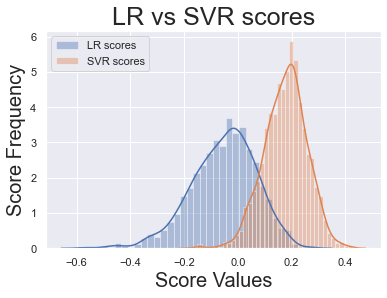

In [6]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [7]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.3174239020733516
0.15968307321701708
0.02027068533259541
0.32260326486263413


## Linear Regression VS XGBoost

In [23]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[08:34:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.055582
[08:34:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.029537
[08:34:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You hav

mean_score_1 -0.05287599802793137, std 0.12103014733684937
mean_score_2 0.11711592162340494, std 0.09445752389742727
Ttest_relResult(statistic=-96.24542175684934, pvalue=0.0)
P value menor ou igual a 0.05


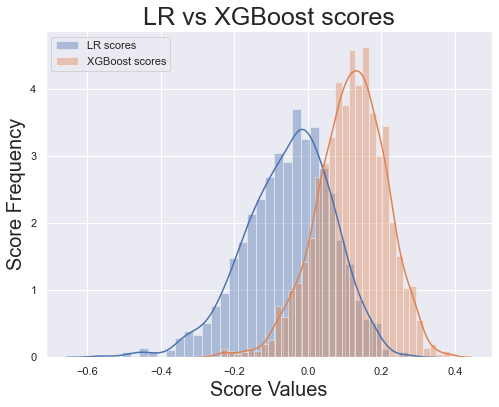

In [9]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [10]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.3174239020733516
0.15968307321701708
-0.08283860661524887
0.28802567190312606


# Linear Regression vs Neural Network

In [11]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.026685
Fold  2 score difference = -0.034510
Fold  1 score difference = -0.017888
Fold  2 score difference = -0.110934
Fold  1 score difference = -0.134739
Fold  2 score difference = -0.058198
Fold  1 score difference = -0.012306
Fold  2 score difference = -0.045158
Fold  1 score difference = -0.139437
Fold  2 score difference = -0.062118
Regression 1 mean score and stdev : 0.079571 + 0.060843
Regression 2 mean score and stdev : 0.143768 + 0.056561
Score difference mean + stdev : -0.064197 + 0.045111
t_value for the current test is -0.573715


mean_score_1 -0.05287599802793137, std 0.12103014733684937
mean_score_2 0.1373225983998303, std 0.08535438865216706
Ttest_relResult(statistic=-139.42336717180325, pvalue=0.0)
P value menor ou igual a 0.05


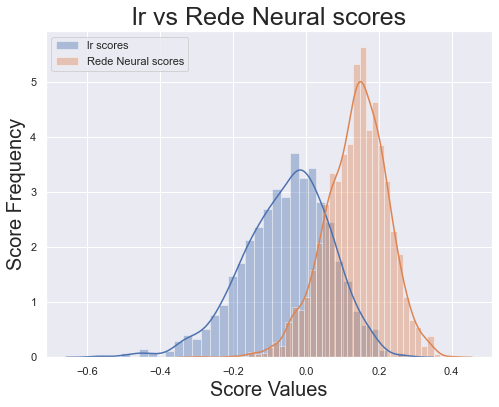

In [12]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'lr', 'Rede Neural')

In [13]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.3174239020733516
0.15968307321701708
-0.04279377146379136
0.29049588389724856


## SVR VS XGboost

In [14]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[08:30:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = -0.020732
[08:30:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = 0.068705
[08:30:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.17731171877855176, std 0.07947430947402315
mean_score_2 0.11711592162340494, std 0.09445752389742727
Ttest_relResult(statistic=46.25724917923923, pvalue=0.0)
P value menor ou igual a 0.05


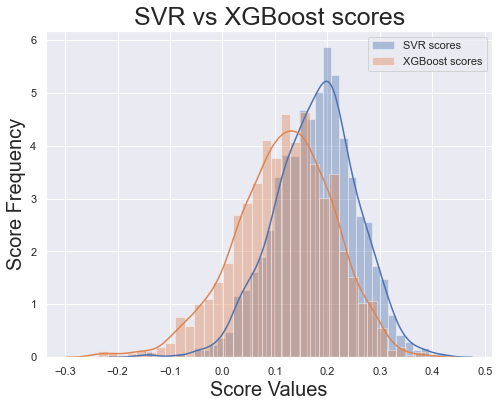

In [15]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [16]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.02027068533259541
0.32260326486263413
-0.08283860661524887
0.28802567190312606


# SVR vs Neural Network

In [17]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.008981
Fold  2 score difference = 0.061332
Fold  1 score difference = 0.043921
Fold  2 score difference = -0.012084
Fold  1 score difference = 0.008307
Fold  2 score difference = 0.000642
Fold  1 score difference = 0.010061
Fold  2 score difference = 0.074141
Fold  1 score difference = 0.034779
Fold  2 score difference = 0.048158
Regression 1 mean score and stdev : 0.170436 + 0.041477
Regression 2 mean score and stdev : 0.142613 + 0.053152
Score difference mean + stdev : 0.027824 + 0.027151
t_value for the current test is 0.280924


mean_score_1 0.17731171877855176, std 0.07947430947402315
mean_score_2 0.1373225983998303, std 0.08535438865216706
Ttest_relResult(statistic=47.692336443621556, pvalue=0.0)
P value menor ou igual a 0.05


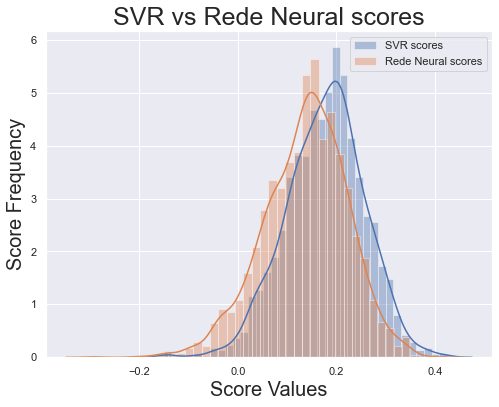

In [18]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'Rede Neural')

In [19]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

0.02027068533259541
0.32260326486263413
-0.04279377146379136
0.29049588389724856


# XGBoost vs Neural Network

In [20]:
five_two(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

[08:31:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  1 score difference = 0.027225
[08:31:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
Fold  2 score difference = -0.007626
[08:31:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/gbm/gbtree.cc:82: DANGER AHEAD: You have

mean_score_1 0.11711592162340494, std 0.09445752389742727
mean_score_2 0.1373225983998303, std 0.08535438865216706
Ttest_relResult(statistic=-16.22032974604536, pvalue=4.564624266359154e-56)
P value menor ou igual a 0.05


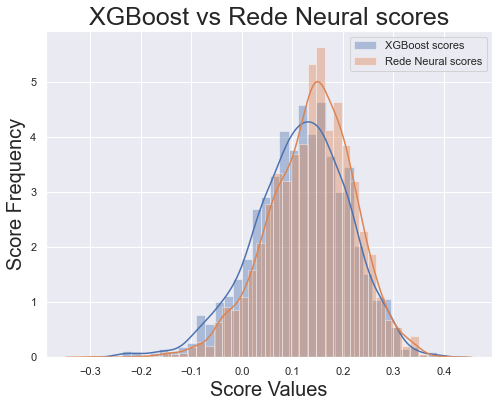

In [21]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('xgboost'),
    reg2=load_model('mlpRegressor'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'XGBoost', 'Rede Neural')

In [22]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.08283860661524887
0.28802567190312606
-0.04279377146379136
0.29049588389724856
